In [1]:
conda install tensorflow

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.2

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /srv/conda/envs/notebook

  added / updated specs:
    - tensorflow


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    absl-py-0.13.0             |     pyhd8ed1ab_0          97 KB  conda-forge
    astor-0.8.1                |     pyh9f0ad1d_0          25 KB  conda-forge
    ca-certificates-2021.5.30  |       ha878542_0         136 KB  conda-forge
    cached-property-1.5.2      |       hd8ed1ab_1           4 KB  conda-forge
    cached_property-1.5.2      |     pyha770c72_1          11 KB  conda-forge
    certifi-2021.5.30          |   py36h5fab9bb_0         141 KB  cond

In [2]:
conda install keras

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.2

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /srv/conda/envs/notebook

  added / updated specs:
    - keras


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    keras-2.3.1                |           py36_0         591 KB  conda-forge
    libgpuarray-0.7.6          |    h7f98852_1003         245 KB  conda-forge
    pygpu-0.7.6                |py36h92226af_1002         648 KB  conda-forge
    theano-0.9.0               |           py36_1         4.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         5.5 MB

The following NEW packages will be INSTALLED:

  keras              conda-forge/linux-64::keras-2.3.1-py36_

In [3]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)
#we are using retuer data set and setting 10,000 most common words

Using TensorFlow backend.
/srv/conda/envs/notebook/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/srv/conda/envs/notebook/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/srv/conda/envs/notebook/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/srv/conda/envs/notebook/lib/python3.6/site-packag

2113536/2110848 [==============================] - 0s 0us/step


/srv/conda/envs/notebook/lib/python3.6/site-packages/keras/datasets/reuters.py:85: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/srv/conda/envs/notebook/lib/python3.6/site-packages/keras/datasets/reuters.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [4]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])
#decoding back into words

557056/550378 [==============================] - 0s 0us/step


In [5]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
   results = np.zeros((len(sequences), dimension))
   for i, sequence in enumerate(sequences):
       results[i, sequence] = 1.
   return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
#we are vecotrigzing the train and test data

In [6]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
#The last layer is 46 which means that network will output a 46 dimentional layer
#The last  layer uses activation of softmax which means it output a probability distribution over 46 different input


In [7]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [8]:
def to_one_hot(labels, dimension=46):
   results = np.zeros((len(labels), dimension))
   for i, label in enumerate(labels):
    results[i, label] = 1.
   return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]
#we need to vectorize the training and test labels
#we are hot encoding and embaleing each label as an all zero vecotr with 1 in the place of label index

In [13]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 262us/step - loss: 0.0968 - accuracy: 0.9589 - val_loss: 1.2265 - val_accuracy: 0.7890
Epoch 2/20
7982/7982 [==============================] - 2s 267us/step - loss: 0.0917 - accuracy: 0.9578 - val_loss: 1.2423 - val_accuracy: 0.7970
Epoch 3/20
7982/7982 [==============================] - 2s 254us/step - loss: 0.0944 - accuracy: 0.9605 - val_loss: 1.2549 - val_accuracy: 0.7920
Epoch 4/20
7982/7982 [==============================] - 2s 267us/step - loss: 0.0950 - accuracy: 0.9585 - val_loss: 1.2639 - val_accuracy: 0.7940
Epoch 5/20
7982/7982 [==============================] - 2s 258us/step - loss: 0.0950 - accuracy: 0.9583 - val_loss: 1.2470 - val_accuracy: 0.7880
Epoch 6/20
7982/7982 [==============================] - 2s 253us/step - loss: 0.0906 - accuracy: 0.9592 - val_loss: 1.3483 - val_accuracy: 0.7850
Epoch 7/20
7982/7982 [==============================] - 2s 256us/step - loss

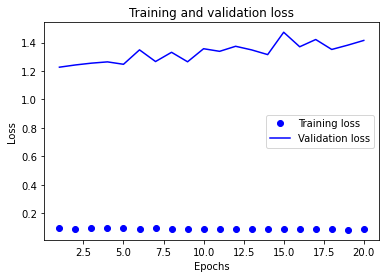

In [15]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
#plotting the traiining and validation loss

In [17]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
#plotting the training and validation accuracy

KeyError: 'acc'

In [18]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
#model begins to overfit after 9 epochs from previous so we use 9 epochs

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 263us/step - loss: 2.6605 - accuracy: 0.5264 - val_loss: 1.7785 - val_accuracy: 0.6380
Epoch 2/9
7982/7982 [==============================] - 2s 238us/step - loss: 1.4460 - accuracy: 0.7053 - val_loss: 1.3157 - val_accuracy: 0.7150
Epoch 3/9
7982/7982 [==============================] - 2s 250us/step - loss: 1.0567 - accuracy: 0.7776 - val_loss: 1.1377 - val_accuracy: 0.7580
Epoch 4/9
7982/7982 [==============================] - 2s 240us/step - loss: 0.8290 - accuracy: 0.8250 - val_loss: 1.0450 - val_accuracy: 0.7740
Epoch 5/9
7982/7982 [==============================] - 2s 248us/step - loss: 0.6606 - accuracy: 0.8604 - val_loss: 0.9696 - val_accuracy: 0.7950
Epoch 6/9
7982/7982 [==============================] - 2s 250us/step - loss: 0.5329 - accuracy: 0.8875 - val_loss: 0.9257 - val_accuracy: 0.8070
Epoch 7/9
7982/7982 [==============================] - 2s 240us/step - loss: 0.428

In [ ]:
results